In [1]:
def forwardeuler(f,t0,u0,T,M):
    """
    Computes an approximate solution u of an ODE 

        u' = f(t,u)

    with a forward Euler method subject to u(t0) = u0.

    Parameters
    ----------

    f: The right-hand side function of (t,u).
    t0: The initial time.
    u0: The initial condition at t=t0.
    T: Endpoint of solution t-interval [t0,T]
    M: The number of equally spaced time steps.

    Returns
    -------

    t: An array of sample times.
    u: The approximate solution at the sample times.
    """
    import numpy as np
    t=np.linspace(t0,T,M+1)

    u = [None]*(M+1) #np.zeros( (M+1,) )

    u[0] = u0

    h = (T-t0)/M

    u_curr = u0
    for k in range(0,M):
        u_curr = u_curr + h*f(t[k],u_curr)
        u[k+1] = u_curr

    u = np.array(u)
    return (t,u.transpose())



In [2]:
import numpy as np
import matplotlib.pyplot as pp

In [3]:
rhs = lambda t,u : np.cos(t)
u_exact = lambda t: 1.2+np.sin(t)

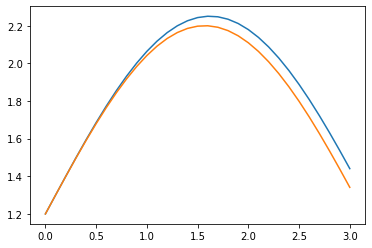

In [4]:
(t,u) = forwardeuler(rhs,t0=0,u0=1.2,T=3,M=30)
pp.plot(t,u,t,u_exact(t))

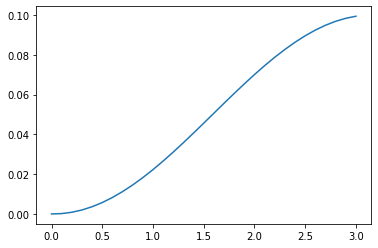

In [129]:
pp.plot(t,u-u_exact(t))

We can talk about that graph.  Even with $x$ and $y$.

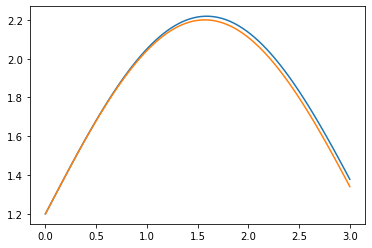

In [130]:
(t,u) = forwardeuler(rhs,t0=0,u0=1.2,T=3,M=80)
pp.plot(t,u,t,u_exact(t))

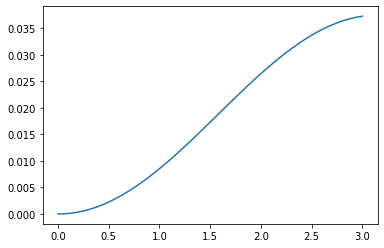

In [131]:
pp.plot(t,u-u_exact(t))

In [12]:
rhs = lambda t,u : -50*(u-np.sin(t))+np.cos(t)
u_exact= lambda t: np.sin(t) + 1.2*np.exp(-50*t)

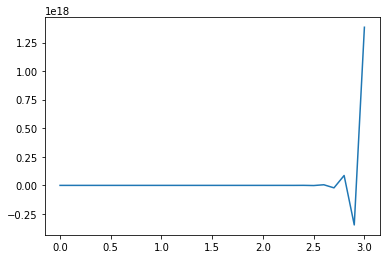

In [13]:
(t,u) = forwardeuler(rhs,t0=0,u0=1.2,T=3,M=30)
pp.plot(t,u)

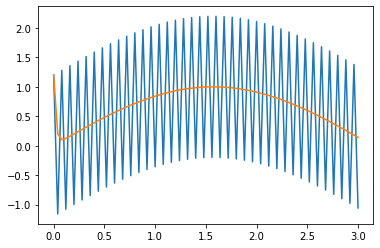

In [7]:
(t,u) = forwardeuler(rhs,t0=0,u0=1.2,T=3,M=75)
pp.plot(t,u,t,u_exact(t))

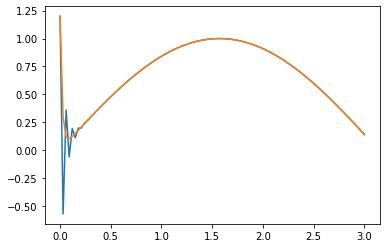

In [8]:
(t,u) = forwardeuler(rhs,t0=0,u0=1.2,T=3,M=100)
pp.plot(t,u,t,u_exact(t))

In [136]:
rhs = lambda t,u : -200*(u-np.sin(t))+np.cos(t)
u_exact= lambda t: np.sin(t) + 1.2*np.exp(-200*t)

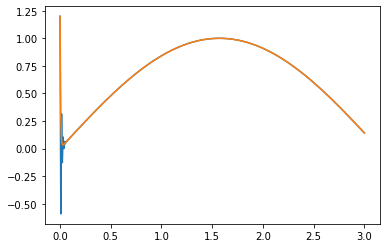

In [140]:
(t,u) = forwardeuler(rhs,t0=0,u0=1.2,T=3,M=400)
pp.plot(t,u,t,u_exact(t))

In [9]:
def backwardeuler(f,t0,u0,T,M):
    import numpy as np
    from scipy.optimize import fsolve

    t=np.linspace(t0,T,M+1)

    u = np.zeros( (M+1,))

    u[0] = u0
    u_curr = u0

    h = (T-t0)/M

    for k in range(M):
        t_next = t[k+1]
        F = lambda U : u_curr - U + h*f(t_next,U)
        u_curr = fsolve(F,u_curr)

        u[k+1] = u_curr

    return (t,u)

In [10]:
rhs = lambda t,u : -50*(u-np.sin(t))+np.cos(t)
u_exact= lambda t: np.sin(t) + 1.2*np.exp(-50*t)

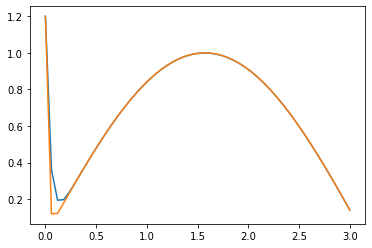

In [17]:
(t,u) = backwardeuler(rhs,t0=0,u0=1.2,T=3,M=50)
pp.plot(t,u,t,u_exact(t))

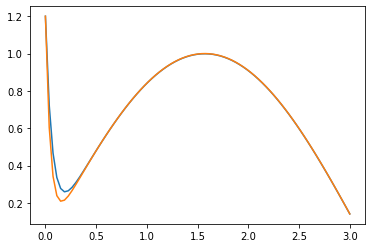

In [75]:
(t,u) = backwardeuler(rhs,t0=0,u0=1.2,T=3,M=80)
pp.plot(t,u,t,u_exact(t))

In [117]:
rhs2 = lambda t,u: np.array([-u[0],-20*u[1],-40*u[2]])

In [121]:
(t,u)=forwardeuler(rhs2,t0=0,u0=[1,1,1],T=3,M=20)

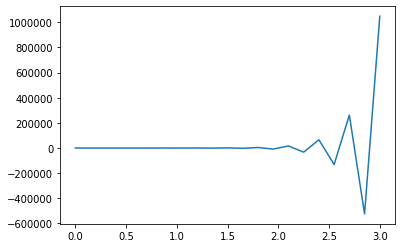

In [122]:
pp.plot(t,u[1,:])

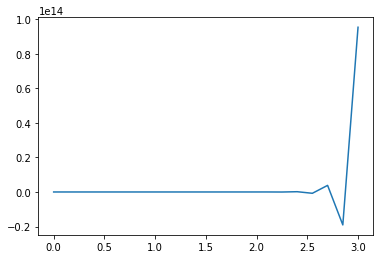

In [123]:
pp.plot(t,u[2,:])

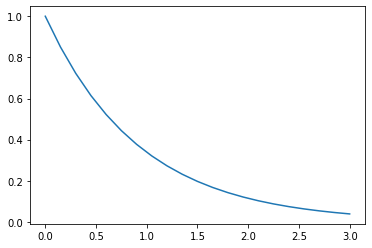

In [124]:
pp.plot(t,u[0,:])

In [58]:
(t,u)=forwardeuler(rhs2,t0=0,u0=[1,1,1],T=3,M=200)

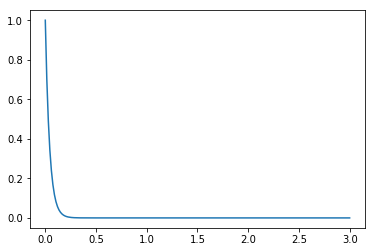

In [59]:
pp.plot(t,u[1,:])

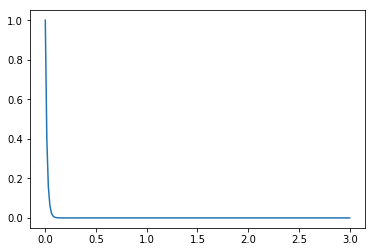

In [60]:
pp.plot(t,u[2,:])

In [39]:
import pip

In [97]:
np.array(u)

array([[ 1.00000000e+00,  1.00000000e+00,  1.00000000e+00],
       [ 8.50000000e-01, -2.00000000e+00, -5.00000000e+00],
       [ 7.22500000e-01,  4.00000000e+00,  2.50000000e+01],
       [ 6.14125000e-01, -8.00000000e+00, -1.25000000e+02],
       [ 5.22006250e-01,  1.60000000e+01,  6.25000000e+02],
       [ 4.43705312e-01, -3.20000000e+01, -3.12500000e+03],
       [ 3.77149516e-01,  6.40000000e+01,  1.56250000e+04],
       [ 3.20577088e-01, -1.28000000e+02, -7.81250000e+04],
       [ 2.72490525e-01,  2.56000000e+02,  3.90625000e+05],
       [ 2.31616946e-01, -5.12000000e+02, -1.95312500e+06],
       [ 1.96874404e-01,  1.02400000e+03,  9.76562500e+06],
       [ 1.67343244e-01, -2.04800000e+03, -4.88281250e+07],
       [ 1.42241757e-01,  4.09600000e+03,  2.44140625e+08],
       [ 1.20905494e-01, -8.19200000e+03, -1.22070312e+09],
       [ 1.02769670e-01,  1.63840000e+04,  6.10351562e+09],
       [ 8.73542191e-02, -3.27680000e+04, -3.05175781e+10],
       [ 7.42510862e-02,  6.55360000e+04